In [1]:
# Import our libraries:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        images.append(img)
    return images

In [3]:
# Example usage:
folder_path = '102flowers/jpg1'
loaded_images1 = load_images_from_folder(folder_path)

In [6]:
# Example usage:
folder_path = '102flowers/jpg2'
loaded_images2 = load_images_from_folder(folder_path)

In [7]:
loaded_images = loaded_images1 + loaded_images2

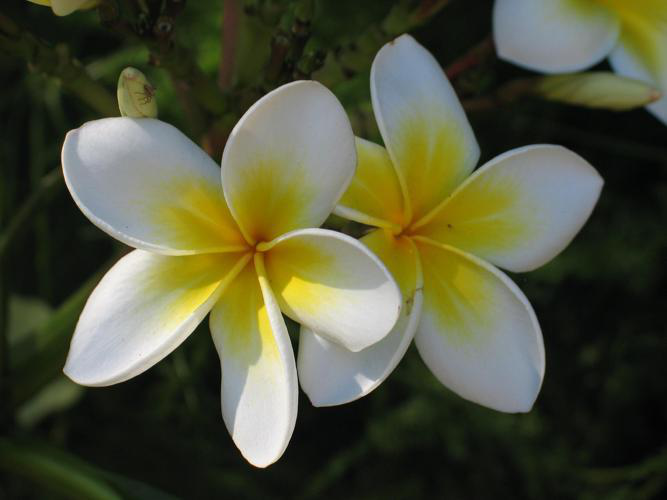

In [8]:
loaded_images[800]

In [9]:
len(loaded_images)

8189

In [10]:
# Load label data:
data = loadmat('imagelabels.mat')

In [11]:
# Our labels:
labels = data['labels']
labels = labels[0]

In [12]:
print(labels)
print(len(labels))

[77 77 77 ... 62 62 62]
8189


In [13]:
# Now let's identify our X and y:
X = loaded_images
y = labels

In [14]:
# Split our data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=42,test_size=0.20, shuffle=True
)

In [15]:
len(X_train)

6551

In [16]:
len(X_test)

1638

In [17]:
len(y_train)

6551

In [18]:
len(y_test)

1638

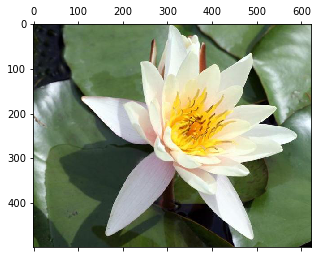

In [19]:
# Let's viusualize some images:
plt.matshow(X_train[11])

In [20]:
# Compare the outpot:
y_train[11]

73

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [25]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(102, activation='softmax')  # 102 classes for flowers
])

In [26]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])